In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_data 



In [ ]:

num_mice = merged_data["Mouse ID"].nunique()

num_mice 

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



duplicate_mice_g989 = merged_data[merged_data["Mouse ID"] == 'g989']


duplicate_mice_g989




In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get the indices of rows with Mouse ID 'g989'
duplicate_indices_g989 = merged_data[merged_data["Mouse ID"] == 'g989'].index

# Drop the rows with Mouse ID 'g989'
cleaned_data = merged_data.drop(duplicate_indices_g989)

cleaned_data 





In [ ]:
# Checking the number of mice in the clean DataFrame.

num_mice_cleaned = cleaned_data["Mouse ID"].nunique()

num_mice_cleaned




In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


sum_stat_table_average = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
sum_stat_table_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
sum_stat_table_variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sum_stat_table_std = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sum_stat_table_sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stat_sum_data_frame = pd.DataFrame({"Mean Tumor Volume": sum_stat_table_average, "Median Tumor Volume": sum_stat_table_median, "Tumor Volume Variance": sum_stat_table_variance, 
                                    "Tumor Volume St. Dev": sum_stat_table_std, "Tumor Volume Std. Err": sum_stat_table_sem})

stat_sum_data_frame 



In [ ]:
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics 

In [ ]:
regimen_counts = cleaned_data.groupby("Drug Regimen").size()


regimen_counts.plot(kind="bar", figsize=(10, 6), color="green", alpha=0.7)


plt.title("Mouse/Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")




plt.tight_layout()
plt.show()

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import matplotlib.pyplot as plt

# Group the data by "Drug Regimen" and count the number of rows for each regimen
regimen_counts = cleaned_data.groupby("Drug Regimen").size()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color="green", alpha=0.7)

# Set the title and labels
plt.title("Mouse/Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")



# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = cleaned_data["Sex"].value_counts()


gender_distribution.plot(kind="pie", figsize=(8, 8), autopct='%1.1f%%', colors=["green", "blue"])

# Set the title and labels
plt.title("Sex")
plt.ylabel("")

# Show the plot
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

# Count the number of male and female mice
gender_distribution = cleaned_data["Sex"].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=["green", "blue"])

# Set the title
plt.title("Sex")

# Show the plot
plt.show()


In [ ]:







# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, cleaned_data, on=["Mouse ID", "Timepoint"], how="inner")

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_regimens = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

specific_regimens 




In [ ]:
# Step 1: Put treatments into a list for a loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Step 2: Create an empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Step 3: Loop through each treatment regimen
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = specific_regimens.loc[specific_regimens["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # Add the tumor volume data for each treatment regimen to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Step 4: Calculate the interquartile range (IQR) for each treatment regimen
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Step 5: Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = (tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)
    
    # Print potential outliers for each treatment regimen
    print(f"Potential outliers for {treatment}:")
    print(tumor_volumes[outliers])



In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.boxplot(tumor_volume_data, labels = treatments)

plt.title("Distr. of Tumor Volume for Each Treatment Group")
plt.xlabel("Treatment Regimen")
plt.ylabel("Final Tumor Volume")

plt.show 



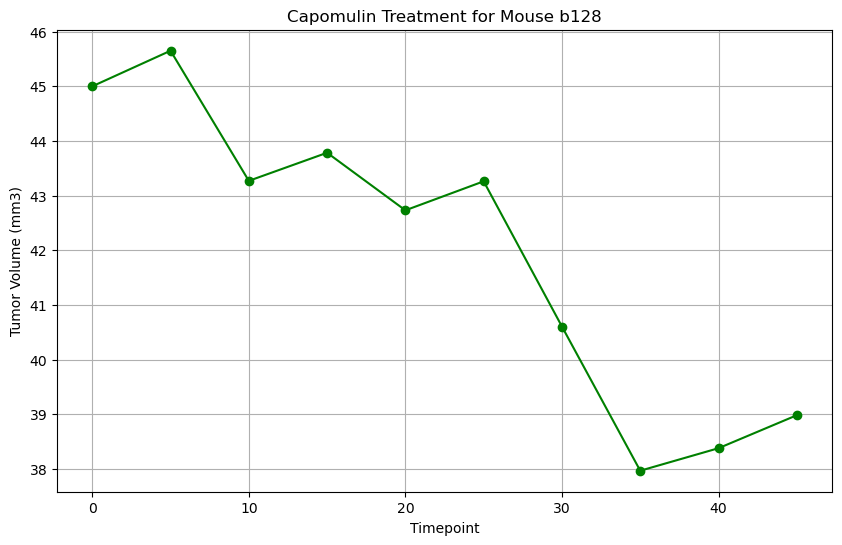

In [97]:
import matplotlib.pyplot as plt

# Step 1: Filter the data to include only mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Step 2: Filter the data for mouse b128 treated with Capomulin
selected_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "b128"]

# Step 3: Plot the tumor volume vs. time point for mouse b128
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o', color='green')
plt.title("Capomulin Treatment for Mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()



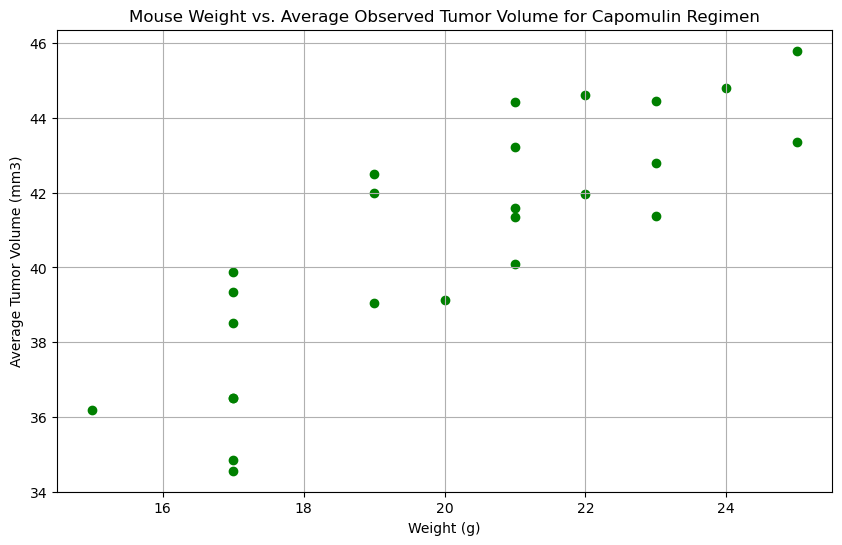

In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


capomulin_avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Step 2: Merge the average tumor volume data with the mouse metadata to get the corresponding weight for each mouse
capomulin_avg_tumor_volume = pd.merge(capomulin_avg_tumor_volume, mouse_metadata, on="Mouse ID", how="left")

# Step 3: Plot the mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume["Weight (g)"], capomulin_avg_tumor_volume["Tumor Volume (mm3)"], color='green')
plt.title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()


Correlation Coefficient: 0.8419363424694721


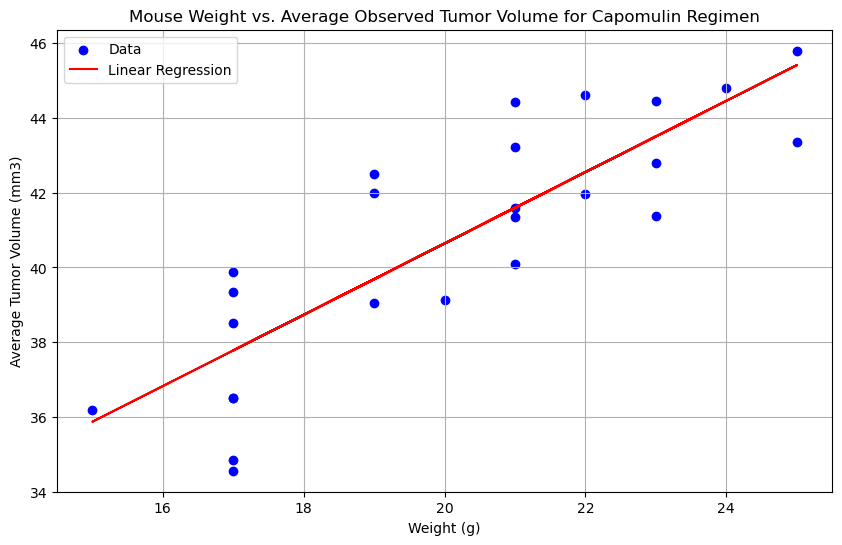

In [103]:


# Step 1: Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(capomulin_avg_tumor_volume["Weight (g)"], capomulin_avg_tumor_volume["Tumor Volume (mm3)"])
print("Correlation Coefficient:", correlation_coefficient)


correlation_coefficient 

import numpy as np

# Step 1: Plot the scatter graph
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume["Weight (g)"], capomulin_avg_tumor_volume["Tumor Volume (mm3)"], color='blue', label="Data")

# Step 2: Plot the linear regression line
x_values = capomulin_avg_tumor_volume["Weight (g)"]
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label="Linear Regression")

# Step 3: Add labels, title, legend, and grid
plt.title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid(True)

# Step 4: Show the plot
plt.show()

